<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/CylindricalPlasmaThruster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Total thrust: 28274.333882305655 Newton


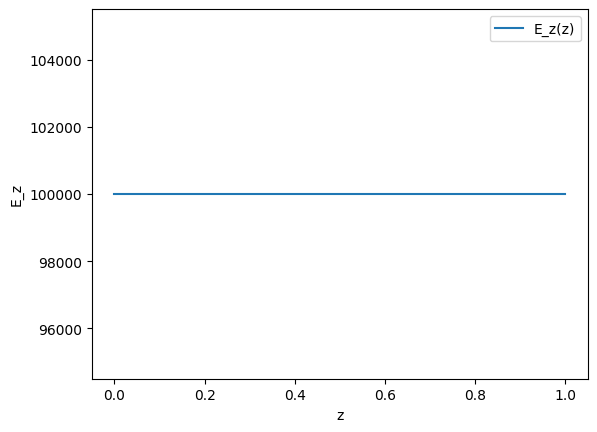

In [1]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt

# Define constants and parameters
epsilon_0 = 8.854187817e-12  # Permittivity of free space
c = 3e8  # Speed of light
R = 3.0  # Radius of the cylinder in meters
H = 1.0  # Height of the cylinder in meters
num_points = 100  # Number of points for numerical integration in each dimension

# Define functions for rho(z), omega(z), and dB/dt(z) - unchanged
def rho(z):
    return np.ones_like(z)*1.0e-2

def omega(z):
    return 2.0 * np.pi * 1.0e4  # the frequency of a spoke in Hall Thrusters

def dBdt(z):
    return 0.2e6 * np.sin(omega(z))

# Differential equation for E_z(z, t) - unchanged
def dEdz(E_z, z):
    dB_dt = dBdt(z)
    return -(1.0 / c ** 2) * dB_dt

# Initial condition and solve DE - unchanged
E_z0 = 100000.0  # See Ref.: Doklady Physics, Vol. 46, No. 1, 2001, pp. 9–11. Translated from Doklady Akademii Nauk, Vol. 376, No. 2, 2001, pp. 183–185.
                 #               Original Russian Text Copyright © 2001 by Oreshko.
z_values = np.linspace(0, H, num_points)
sol = spi.odeint(dEdz, E_z0, z_values)

# Calculate the thrust over the cylinder volume
def integrand(r, theta, z):
    # Example calculation - replace with actual logic
    # Assuming E_z and B_z are the electric and magnetic field components along the z-axis
    E_z = sol[np.searchsorted(z_values, z), 0]
    B_z = dBdt(z)  # This is just a placeholder example
    force_density = rho(z) * E_z  # Simplified example calculation
    return force_density

# Volume integration
r_values = np.linspace(0, R, num_points)
theta_values = np.linspace(0, 2 * np.pi, num_points)
total_thrust = 0
for r in r_values:
    for theta in theta_values:
        for z in z_values:
            dV = r * (R / num_points) * (2 * np.pi / num_points) * (H / num_points)
            total_thrust += integrand(r, theta, z) * dV

print("Total thrust:", total_thrust, "Newton")

# Plotting - unchanged
plt.figure()
plt.plot(z_values, sol[:, 0], label='E_z(z)')
plt.xlabel('z')
plt.ylabel('E_z')
plt.legend()
plt.show()
